In [209]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
data = pd.read_csv('Rice_Osmancik_Cammeo_Dataset.csv')

In [212]:
data.head()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [215]:
data['AREA'].unique().sum()

35992576

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          3810 non-null   int64  
 1   PERIMETER     3810 non-null   float64
 2   MAJORAXIS     3810 non-null   float64
 3   MINORAXIS     3810 non-null   float64
 4   ECCENTRICITY  3810 non-null   float64
 5   CONVEX_AREA   3810 non-null   int64  
 6   EXTENT        3810 non-null   float64
 7   CLASS         3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.3+ KB


In [218]:
data.describe()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144752,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [220]:
data.shape

(3810, 8)

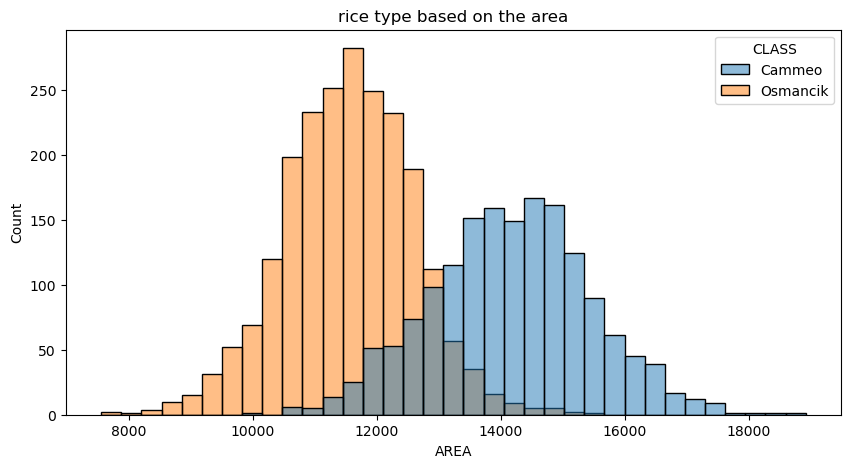

In [221]:
plt.figure(figsize=(10,5))
plt.title('rice type based on the area')
sns.histplot(x='AREA', hue= 'CLASS', data=data)
plt.show()

In [223]:
data.isnull().sum()

AREA            0
PERIMETER       0
MAJORAXIS       0
MINORAXIS       0
ECCENTRICITY    0
CONVEX_AREA     0
EXTENT          0
CLASS           0
dtype: int64

array([[<Axes: title={'center': 'AREA'}>,
        <Axes: title={'center': 'PERIMETER'}>,
        <Axes: title={'center': 'MAJORAXIS'}>],
       [<Axes: title={'center': 'MINORAXIS'}>,
        <Axes: title={'center': 'ECCENTRICITY'}>,
        <Axes: title={'center': 'CONVEX_AREA'}>],
       [<Axes: title={'center': 'EXTENT'}>, <Axes: >, <Axes: >]],
      dtype=object)

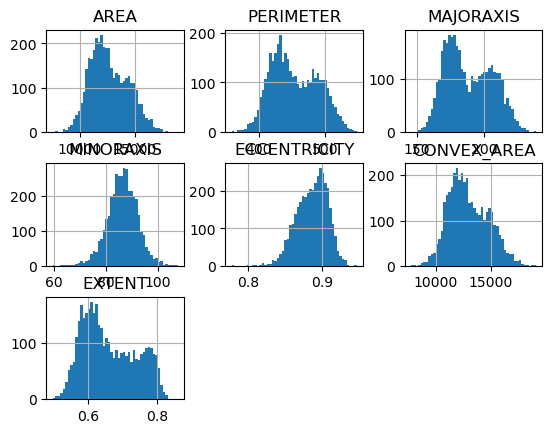

In [225]:
data.hist(bins=50)

In [226]:
dataset_selected = data.iloc[:, 0:7]
dataset_selected.head()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024


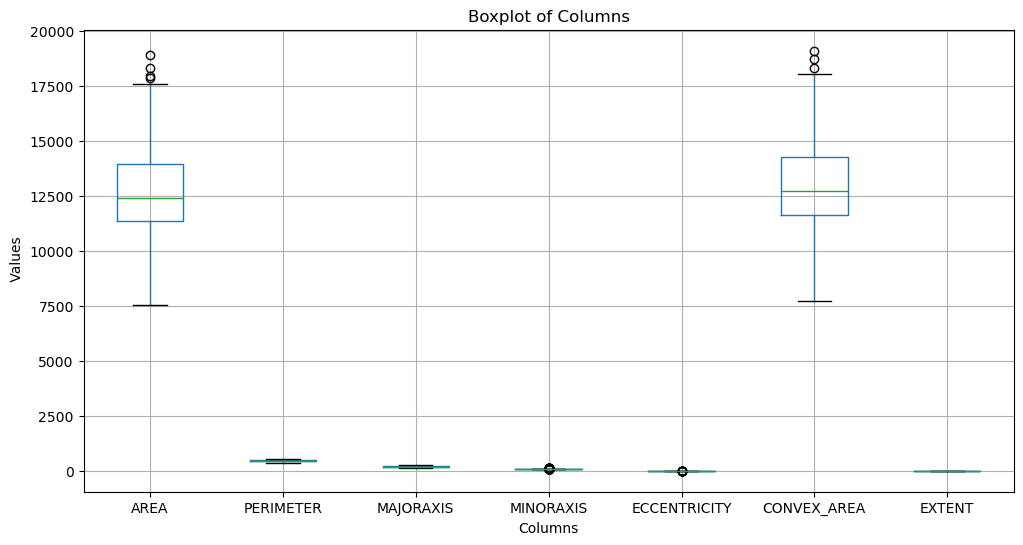

In [227]:
import matplotlib.pyplot as plt
#Boxplot of  Columns
plt.figure(figsize=(12, 6))
dataset_selected.boxplot()
plt.title('Boxplot of Columns')
plt.xlabel('Columns')
plt.ylabel(' Values')
plt.show()


In [230]:
def detect_outliers_iqr(df):
    outliers = pd.DataFrame()
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers[column] = ((df[column] < lower_bound) | (df[column] > upper_bound))
    return outliers


outliers = detect_outliers_iqr(dataset_selected)

print(outliers.sum())


AREA             4
PERIMETER        0
MAJORAXIS        0
MINORAXIS       65
ECCENTRICITY    21
CONVEX_AREA      3
EXTENT           0
dtype: int64


In [231]:
#slice our data into input and output

x = data.iloc[:, [0,1,2,3,4,5,6]].values
y = data.iloc[:, 7].values

In [232]:
# spilitting the dataset into the training and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

In [233]:
data['CLASS'].value_counts()

CLASS
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64

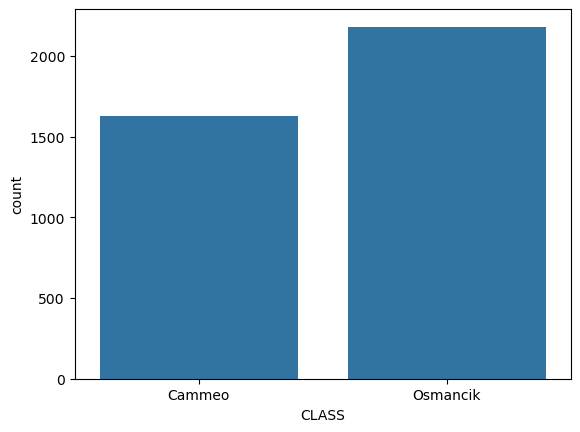

In [234]:
sns.countplot(data, x='CLASS')
plt.show()

<Axes: ylabel='count'>

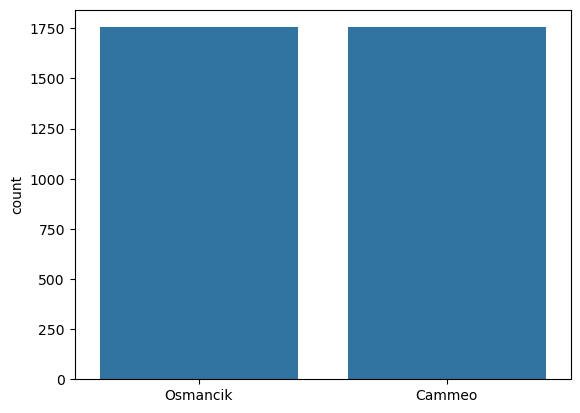

In [235]:
# Applying SMOTE for dataset balancing

from imblearn.over_sampling import SMOTE
resampler= SMOTE(random_state = 0)
x_train_smote, y_train_smote = resampler.fit_resample(x_train, y_train)

sns.countplot(x= y_train_smote)

In [236]:
# standardization
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_s = sc.fit_transform(x_train_smote)
x_test_s = sc.transform(x_test)

In [237]:
# Training Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)

In [238]:
# validate model by using cross validation
cv_scores = cross_val_score(classifier, x_train_s, y_train_smote, cv=5)
print('Cross validation score:', cv_scores)
print('Means cv_scores:', np.mean(cv_scores))

Cross validation score: [0.91310541 0.93732194 0.91595442 0.90740741 0.91737892]
Means cv_scores: 0.9182336182336183


In [239]:
# fitting K-NN to the training set

classifier.fit(x_train_s, y_train_smote)

KNeighborsClassifier()

In [267]:
# predicting the test set results 

y_pred = classifier.predict(x_test_s)
print(y_pred)

['Osmancik' 'Cammeo' 'Cammeo' 'Cammeo' 'Cammeo' 'Cammeo' 'Osmancik'
 'Osmancik' 'Cammeo' 'Osmancik' 'Cammeo' 'Osmancik' 'Osmancik' 'Cammeo'
 'Cammeo' 'Osmancik' 'Cammeo' 'Osmancik' 'Osmancik' 'Cammeo' 'Osmancik'
 'Osmancik' 'Osmancik' 'Osmancik' 'Osmancik' 'Osmancik' 'Cammeo' 'Cammeo'
 'Osmancik' 'Osmancik' 'Cammeo' 'Osmancik' 'Osmancik' 'Osmancik'
 'Osmancik' 'Osmancik' 'Cammeo' 'Cammeo' 'Osmancik' 'Cammeo' 'Osmancik'
 'Osmancik' 'Osmancik' 'Osmancik' 'Osmancik' 'Osmancik' 'Osmancik'
 'Cammeo' 'Cammeo' 'Osmancik' 'Osmancik' 'Osmancik' 'Osmancik' 'Osmancik'
 'Cammeo' 'Osmancik' 'Cammeo' 'Osmancik' 'Cammeo' 'Osmancik' 'Osmancik'
 'Cammeo' 'Osmancik' 'Osmancik' 'Osmancik' 'Cammeo' 'Cammeo' 'Cammeo'
 'Osmancik' 'Cammeo' 'Osmancik' 'Osmancik' 'Osmancik' 'Osmancik' 'Cammeo'
 'Osmancik' 'Cammeo' 'Osmancik' 'Cammeo' 'Osmancik' 'Osmancik' 'Osmancik'
 'Osmancik' 'Osmancik' 'Cammeo' 'Osmancik' 'Osmancik' 'Osmancik' 'Cammeo'
 'Osmancik' 'Osmancik' 'Cammeo' 'Osmancik' 'Cammeo' 'Osmancik' 'Osmancik

In [242]:
# evaluate the performance of model

from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('-----------------------------------')
result= metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.92


Confusion Matrix:
[[305  32]
 [ 27 398]] 


-----------------------------------
Classification Report:

              precision    recall  f1-score   support

      Cammeo       0.92      0.91      0.91       337
    Osmancik       0.93      0.94      0.93       425

    accuracy                           0.92       762
   macro avg       0.92      0.92      0.92       762
weighted avg       0.92      0.92      0.92       762



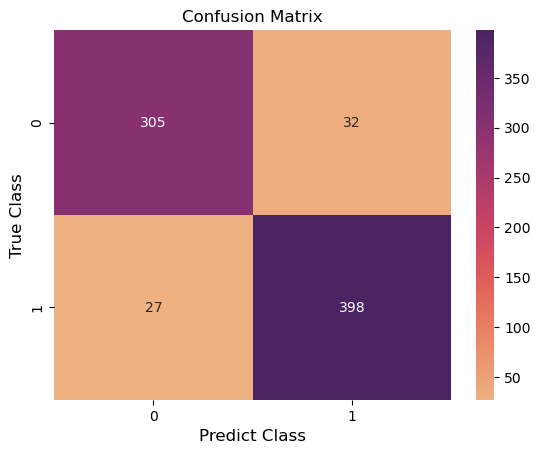

In [243]:
# confusion matrix heatmap

ax= sns.heatmap(cm, cmap='flare', annot=True, fmt='d')

plt.xlabel('Predict Class', fontsize=12)
plt.ylabel('True Class',fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()                 